# Setup and Load Data

1.1 Install Dependencies

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1.2 Load Data

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2'
os.listdir(data_dir)

['fresh', 'good', 'notfeasible']

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2')

Found 540 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# Get another batch from the iterator
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# 0 = fresh || 1 = good || 2 = notfeasible

batch[1]

array([0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 1], dtype=int32)

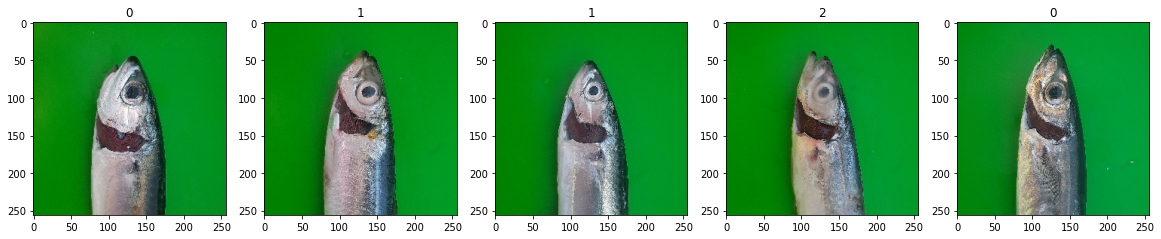

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Pre-process Data

2.1 Scale Data

In [ ]:
data = data.map(lambda x, y: (x/255, y))

2.2 Split Data

In [ ]:
len(data)

In [ ]:
train_size = int(len(data)*.6)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [ ]:
test_size

In [ ]:
train_size+val_size+test_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

3.1 Build Deep Learning Model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, validation_data=val, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 47s 3s/step - loss: 1.2262 - accuracy: 0.3210 - val_loss: 1.0847 - val_accuracy: 0.3646
Epoch 2/20
11/11 [==============================] - 18s 1s/step - loss: 1.0676 - accuracy: 0.5000 - val_loss: 1.0152 - val_accuracy: 0.6979
Epoch 3/20
11/11 [==============================] - 18s 1s/step - loss: 0.9489 - accuracy: 0.5966 - val_loss: 0.8416 - val_accuracy: 0.5417
Epoch 4/20
11/11 [==============================] - 18s 1s/step - loss: 0.8073 - accuracy: 0.6136 - val_loss: 0.6577 - val_accuracy: 0.6771
Epoch 5/20
11/11 [==============================] - 18s 1s/step - loss: 0.5696 - accuracy: 0.7443 - val_loss: 0.4284 - val_accuracy: 0.8125
Epoch 6/20
11/11 [==============================] - 18s 1s/step - loss: 0.4701 - accuracy: 0.7898 - val_loss: 0.5289 - val_accuracy: 0.7500
Epoch 7/20
11/11 [==============================] - 15s 1s/step - loss: 0.3384 - accuracy: 0.8523 - val_loss: 0.2661 - val_accuracy: 0.9062
Epoch 8/20
11/11 [==

3.2 Plot Performance

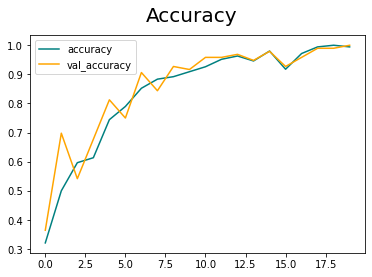

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

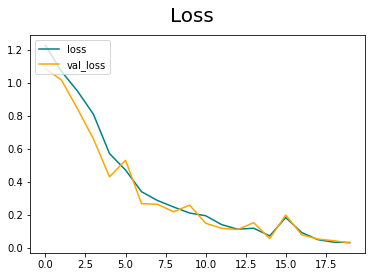

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

4.1 Evaluating on the Test Partition

In [ ]:
model.evaluate(test)

3/3 [==============================] - 7s 117ms/step - loss: 0.0403 - accuracy: 0.9891


[0.040287088602781296, 0.989130437374115]



---



---



4.2 Testing on New Data



*   Percobaan 1 (Banjar Segar)



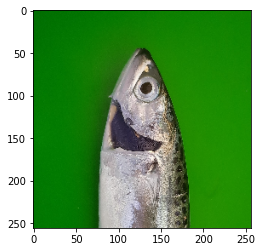

1/1 [==============================] - 0s 195ms/step


array([[0.99844354, 0.00155652, 0.00000003]], dtype=float32)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_segar.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

# Convert to TensorFlow Lite

5.1 Save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'modelfix2.h5'))

5.2 Convert to tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

5.3 Save .tflite model

In [ ]:
with open("modelfix2.tflite", "wb") as f:
  f.write(tflite_model)

In [ ]:
tflite_model_path = "modelfix2.tflite"



---



---

